In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.structure.notears import from_pandas, from_pandas_lasso
import pygraphviz
import networkx as nx

%matplotlib inline

In [2]:
df = pd.read_csv('/home/amon/Desktop/10Academy/industry-casualty/Data/clean_data.csv')

In [3]:
df_drop = df.drop(['Unnamed: 0'], axis=1)
df_drop.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [4]:
df_drop.shape

(569, 31)

Splitting the Data into Train set and Hold-out set

In [8]:
x = df_drop.drop(["diagnosis"], axis=1)
y = df_drop["diagnosis"]

In [9]:
# split into train and test set
x_train, x_test, y_train, y_test = train_test_split(
    x, y, stratify=y, test_size=0.10, random_state=42
)

In [10]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [11]:
sel.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [12]:
selected_feat= x_train.columns[(sel.get_support())]
len(selected_feat)

10

In [13]:
selected_feat

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'concavity_mean',
       'concave points_mean', 'area_se', 'radius_worst', 'perimeter_worst',
       'area_worst', 'concave points_worst'],
      dtype='object')

In [16]:
final_data = df_drop[['diagnosis','radius_mean','perimeter_mean','area_mean', 'concavity_mean', 'concave points_mean', 'radius_worst',
       'perimeter_worst', 'area_worst', 'area_se',
       'concave points_worst']].copy()
final_data.head()

,diagnosis,radius_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,perimeter_worst,area_worst,area_se,concave points_worst
0,1,1.097064,1.269934,0.984375,2.652874,2.532475,1.886690,2.303601,2.001237,2.487578,2.296076
1,1,1.829821,1.685955,1.908708,-0.023846,0.548144,1.805927,1.535126,1.890489,0.742402,1.087084
2,1,1.579888,1.566503,1.558884,1.363478,2.037231,1.511870,1.347475,1.456285,1.181336,1.955000
3,1,-0.768909,-0.592687,-0.764464,1.915897,1.451707,-0.281464,-0.249939,-0.550021,-0.288378,2.175786
4,1,1.750297,1.776573,1.826229,1.371011,1.428493,1.298575,1.338539,1.220724,1.190357,0.729259


In [17]:
final_data.shape

(569, 11)

/home/amon/anaconda3/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


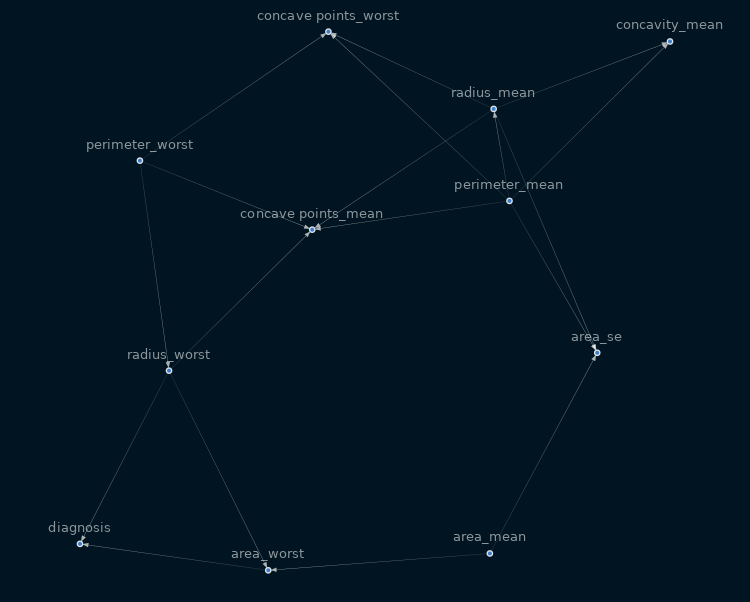

In [18]:
sm = from_pandas(final_data, w_threshold=0.8)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [20]:
df_1 = final_data.iloc[:100,:]
df_2 = final_data.iloc[:300,:]
df_3 = final_data.iloc[:,:]

/home/amon/anaconda3/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


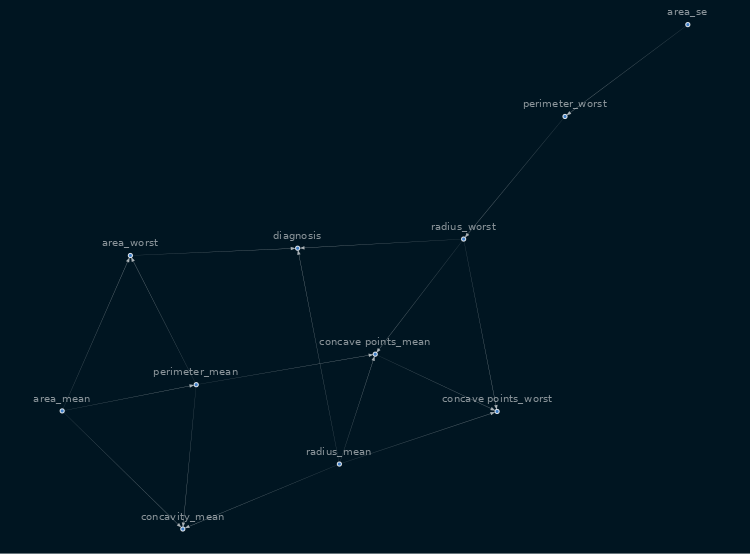

In [22]:
sm_df1 = from_pandas(df_1, tabu_parent_nodes=['diagnosis'], w_threshold=0.8)
viz = plot_structure(
    sm_df1,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

/home/amon/anaconda3/lib/python3.8/site-packages/pygraphviz/agraph.py:1390: RuntimeWarning: Warning: node 'diagnosis', graph '' size too small for label

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


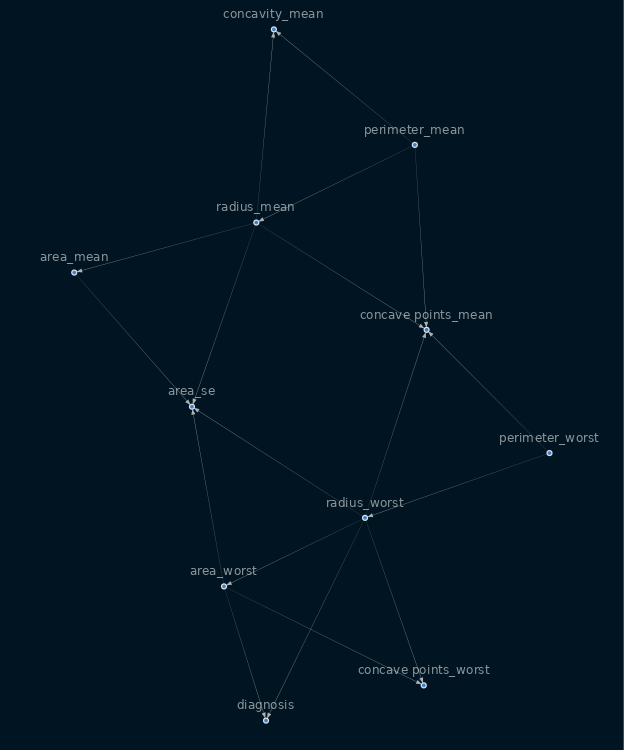

In [23]:
sm_df2 = from_pandas(df_2, tabu_parent_nodes=['diagnosis'], w_threshold=0.8)
viz = plot_structure(
    sm_df2,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [25]:
def jaccard_similarity(g, h):
    i = set(g).intersection(h)
    return round(len(i) / (len(g) + len(h) - len(i)),3)

def Jaccar_score(g, h):    
    i = set(g).intersection(set(h))
    u = set(g).union(set(h))
    return len(i) / float(len(u))

In [26]:
jaccard_similarity(sm_df1, sm_df2)

1.0

In [27]:
Jaccar_score(sm_df1, sm_df2)

1.0

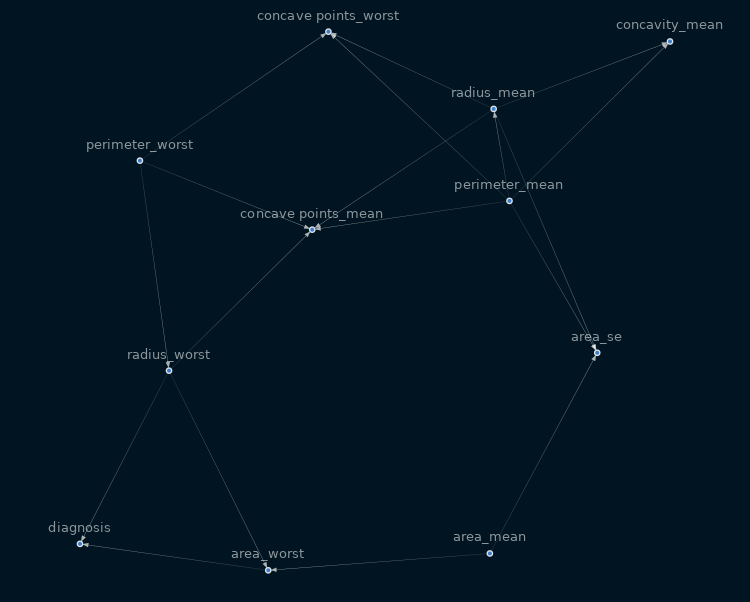

In [28]:
sm_df3 = from_pandas(df_3, tabu_parent_nodes=['diagnosis'], w_threshold=0.8)
viz = plot_structure(
    sm_df3,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [29]:
jaccard_similarity(sm_df2, sm_df3)

1.0

In [30]:
Jaccar_score(sm_df2, sm_df3)

1.0

In [31]:
sm.add_edge("concave points_mean", "diagnosis")
sm.add_edge("concave points_worst", "diagnosis")
sm.add_edge("area_worst", "diagnosis")
sm.add_edge("area_mean", "diagnosis")
sm.add_edge("perimeter_worst", "diagnosis")
sm.remove_edge("perimeter_mean", "radius_mean")

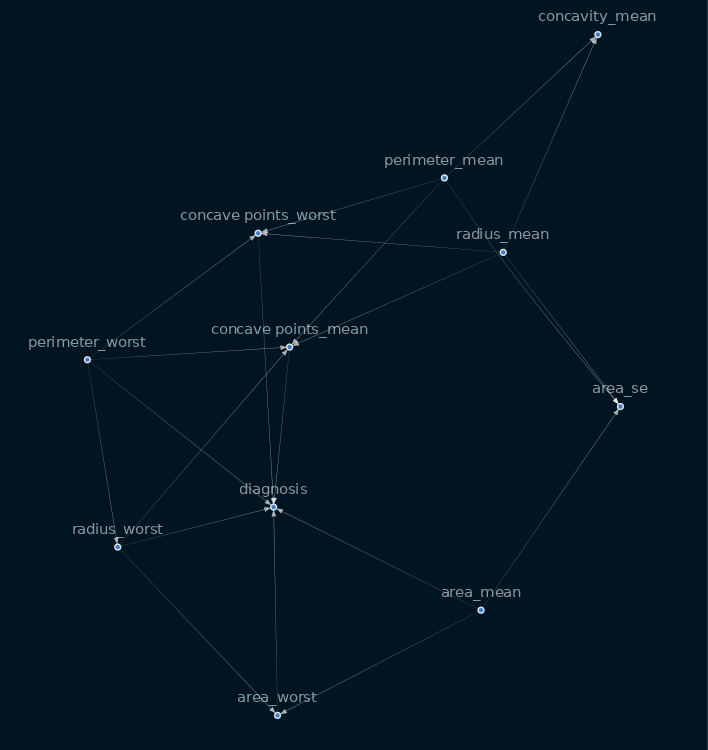

In [32]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "2.0", 'size':2.5},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))